In [ ]:
from gensim.models import KeyedVectors
from gensim.similarities import WmdSimilarity
from nltk.tokenize import word_tokenize
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/google.bin.gz'
reference_file = "input.txt"
generated_file = "output.txt"
w2v = KeyedVectors.load_word2vec_format(path, binary=True)
w2v.init_sims(replace=True)

Mounted at /content/drive


<ipython-input-1-2b129dfb0116>:10: DeprecationWarning: Call to deprecated `init_sims` (Use fill_norms() instead. See https://github.com/RaRe-Technologies/gensim/wiki/Migrating-from-Gensim-3.x-to-4).
  w2v.init_sims(replace=True)


In [ ]:
!pip install POT

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 8.8 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

def process_sentences(sentence_a, sentence_b):
  tokenized_sentence_a = word_tokenize(sentence_a)
  tokenized_sentence_b = word_tokenize(sentence_b)
  shakespearan_stopwords = ['thou', "thee", "thy", "thine", "ye", "art", "hath", "dost", "doth", "'tis", "anon", "ere", "hence", "thither", "whence",
                          "wherefore", "whither", "ay", "nay", "thus", "'twixt", "yon", "oft", "'twas", "yea", "ne'er", "o'er", "hither", "henceforth",
                          "'twill", "'twas", "'tis", "verily", "unto", "amongst", "among", "betwixt", "ere", "'gainst", "'mongst", "oftentimes", "oft",
                          "aught", "hath", "henceforth", "whene'er", "ne'er", "anon", "'twill", "yon", "thou'rt", "doth", "'tis", "'twas", "'tis",
                          "tis", "i'faith", "dost", "thyself", "thine","thy", "thyself", "thine", "whereon", "wherefore", "whereupon", "whereof",
                          "hereof", "thereof", "oftentimes"]

  stop_words = set(stopwords.words('english'))
  stop_words = set(shakespearan_stopwords + list(stop_words))

  filtered_sentence_a = [token for token in tokenized_sentence_a if token.lower() not in stop_words]
  filtered_sentence_b = [token for token in tokenized_sentence_b if token.lower() not in stop_words]
  return filtered_sentence_a, filtered_sentence_b

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Word Mover Distance

In [ ]:
import math
wmd = []
with open(reference_file) as f1, open(generated_file) as f2:
  for sentence_a, sentence_b in zip(f1, f2):
    a, b = process_sentences(sentence_a, sentence_b)
    distance = w2v.wmdistance(a, b)
    if math.isinf(distance):
      continue
    wmd.append(distance)

average_distance = sum(wmd) / len(wmd)
print("Average distance:", average_distance)

Average distance: 0.1415942676720768


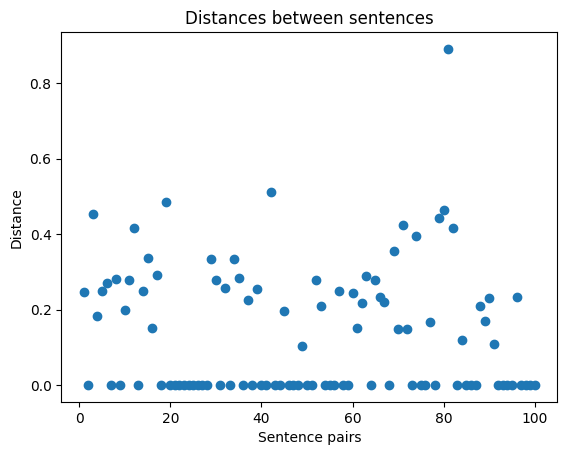

In [ ]:
import matplotlib.pyplot as plt
sentence_pairs = list(range(1, len(wmd) + 1))
plt.scatter(sentence_pairs, wmd)
plt.title('Distances between sentences')
plt.xlabel('Sentence pairs')
plt.ylabel('Distance')
plt.show()

In [ ]:
!pip install evaluate
!pip install bert_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 62.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

# BERTSCORE

In [ ]:
from evaluate import load
bertscore = load("bertscore")
predictions = ["hello world"]
references = ["hello world"]
reference_file = "input.txt"
generated_file = "output.txt"

with open(reference_file) as f1, open(generated_file) as f2:
  for sentence_a, sentence_b in zip(f1, f2):
    a, b = process_sentences(sentence_a, sentence_b)
    predictions.append(a)
    references.append(b)
results = bertscore.compute(predictions=predictions, references=references, model_type="distilbert-base-uncased")
for key, value in results.items():
  if key == 'hashcode':
    break
  print(key + ": ", sum(value) / len(value))

# Vector Similarity

In [ ]:
!pip install -U sentence-transformers

In [ ]:
import sentence_transformers as st
import numpy as np
model = st.SentenceTransformer('paraphrase-MiniLM-L6-v2')
import math
def normalize(v):
  minimum = min(v)
  maximum = max(v)
  norm_v = [(val - minimum) / (maximum - minimum) for val in v]
  return norm_v

def magnitude(vector):
    return math.sqrt(sum(component ** 2 for component in vector))

def calculate_cosine_similarity(sentence1, sentence2):
    [vec_a, vec_b] = model.encode([sentence1, sentence2], convert_to_tensor=False)
    vec_a = normalize(vec_a)
    vec_b = normalize(vec_b)
    mag_a = magnitude(vec_a)
    mag_b = magnitude(vec_b)
    return np.dot(vec_a, vec_b) / (mag_a * mag_b)

def vector_similarity(a, b):
  a, b = process_sentences(sentence_a, sentence_b)
  similarity = calculate_cosine_similarity(a, b)
  return similarity
scores = []
with open(reference_file) as f1, open(generated_file) as f2:
  for sentence_a, sentence_b in zip(f1, f2):
    similarity = vector_similarity(sentence_a, sentence_b)
    scores.append(similarity)

print("Cosine Similarity:", sum(scores) / len(scores))


#METEOR

In [ ]:
nltk.download('wordnet')

In [ ]:
from nltk.translate.meteor_score import meteor_score

reference = "The quick brown fox jumps over the lazy dog"
candidate = "A quick brown fox jumps over a lazy dog"
reference, candidate = process_sentences(reference, candidate)

score = meteor_score([reference], candidate)
print("Meteor Score:", score)

# BLEU

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

reference = "The quick brown fox jumps over the lazy dog"
candidate = "A quick brown fox jumps over a lazy dog"

score = sentence_bleu([reference], candidate)
print("BLEU Score:", score)

# LLM Evaluation

In [ ]:
reference = "hello my name is ayaan"
generated = "hello, thou name ayaan"
tok_ref = word_tokenize(reference)
tok_gen = word_tokenize(reference)
no_stopword_ref, no_stopword_gen = process_sentences(reference, generated)
vector_sim = vector_similarity(reference, generated)
bleu = sentence_bleu([reference], generated)
meteor = meteor_score([tok_ref], tok_gen)
wmd = w2v.wmdistance(reference, generated)
bert = bertscore.compute(predictions=[generated], references=[reference], model_type="distilbert-base-uncased")['f1'][0]
prompt = f"""You are an LLM evaluator for Text Style Transfer. In specific, the task at hand is evaluating how well style was transfer from a sentence of normal, modern style to Shakespearean styled text. In specific, you will evaluate on a metric of 0 - 100, taking into account a few factors: how accurate the style was transferred, how accurately the content/sentiment was preserved, how fluent the shakespearen text is, how grammatically correct it is, and general naturalness of the text in shakespearean style. For example, you should give a 0 if the sentence is exactly the same, with no attempt of changing it. You should give a score of 90 - 100 if it is the best possible shakespearean version of saying the input sentence. You have a few metrics available to you, each on a scale of 0 - 1, with 1 being the ideal score.

Word Mover Distance: {wmd}
BERTSCORE: {bert}
Vector (cosine) Similarity of the two sentences: {vector_sim}
BLEU score: {bleu}
METEOR Score: {meteor}

It is very much possible that these scores can be high while actually, the actual transfer is low on human evaluation (the most accurate evaluation. It is also very much possible that these scores can be low while actually, the actual transfer is high on human evaluation. You are provided with these metrics to make a thorough, more informed evaluation. Please output just your evaluation. The sentences are:

Normal Text: {reference}
Shakespearean Text: {generated}

Please output just the score you would give to this transfer and nothing else"""

In [ ]:
import requests
import re
url = "https://api.together.xyz/v1/chat/completions"
scores = []
models = ["meta-llama/Llama-2-70b-chat-hf", "mistralai/Mixtral-8x7B-Instruct-v0.1", "google/gemma-7b-it"]
for model in models:
  model_name = model
  stop_sequence = ["</s>"]

  payload = {
      "model": model_name,
      "messages": [{"role": "user", "content": prompt}],  # Include your prompt here
      "stop": stop_sequence
  }

  headers = {
      "accept": "application/json",
      "content-type": "application/json",
      "Authorization": "api key"
  }

  response = requests.post(url, json=payload, headers=headers)
  output = response.json()["choices"][0]["message"]["content"]
  number = re.search(r'\b\d+\b', output).group()
  score = int(number)
  scores.append(score)
print((sum(scores)/len(scores)) / 100)

# Eval MSE

Mean Squared Error (MSE): 7.344444444444444


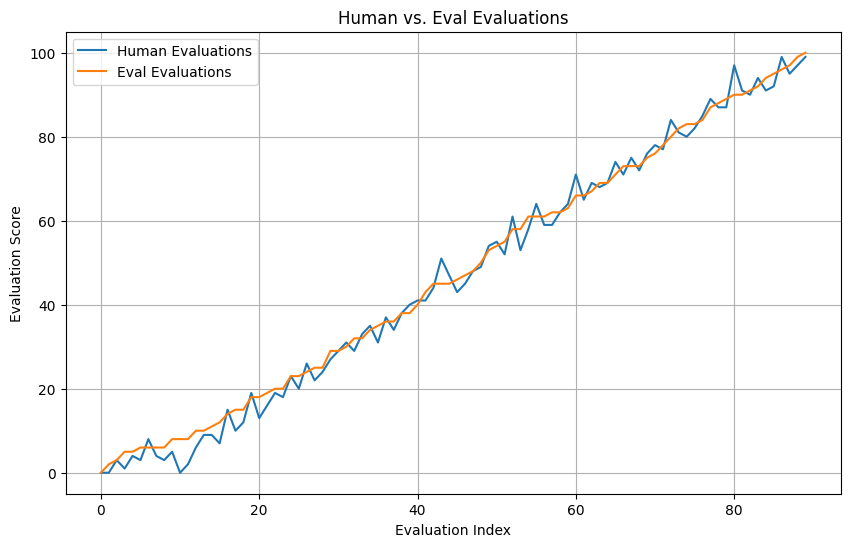

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

predictions = []
references = []
with open('human.txt') as f1, open('evals.txt') as f2:
  for b, a in zip(f1, f2):
    predictions.append(int(a))
    references.append(int(b))
indices_sorted = sorted(range(len(predictions)), key=lambda k: predictions[k])

# Sort both arrays based on the sorted indices
predictions = [predictions[i] for i in indices_sorted]
references = [references[i] for i in indices_sorted]
mse = mean_squared_error(predictions, references)
print("Mean Squared Error (MSE):", mse)

plt.figure(figsize=(10, 6))

plt.plot(references, label='Human Evaluations')

plt.plot(predictions, label='Eval Evaluations')

# Labels and title
plt.xlabel('Evaluation Index')
plt.ylabel('Evaluation Score')
plt.title('Human vs. Eval Evaluations')

# Legend
plt.legend()

# Grid
plt.grid(True)

# Show the plot
plt.show()